In [1]:
import pandas as pd 

df_train = pd.read_csv('../data/train_data_stg.csv', delimiter='|')
df_test = pd.read_csv('../data/test_data_stg.csv', delimiter='|')

In [2]:
df_train.head()

,rank,t,p
0,1,11662839.55,7622.0
1,2,1931166.67,1164.0
2,3,78411667.44,432896.0
3,4,2274540.32,10046.0
4,5,2113766.13,1962.0


In [3]:
df_test.head()

,rank,t,p
0,25,32625522.00,25408.0
1,30,9678145.70,68264.0
2,53,3453252.19,3437.0
3,65,2727246.97,12729.0
4,66,1161085.64,2417.0


In [4]:
df_train = df_train.drop(['rank'], axis=1)
df_test = df_test.drop(['rank'], axis=1)

In [5]:
import numpy as np
df_train['t'] = np.log(df_train['t'])
df_train['p'] = np.log(df_train['p'])

df_test['t'] = np.log(df_test['t'])
df_test['p'] = np.log(df_test['p'])

In [6]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3), n_estimators=500,
    learning_rate=0.01, random_state=42
)
ada_reg.fit(df_train[['t']], df_train['p'])

prediction = ada_reg.predict(df_test[['t']])

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

print("Result on the logged data")
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(df_test[['p']], prediction))
print("Root Mean Squarred Error (RMSE): %.2f" % root_mean_squared_error(df_test[['p']], prediction))
print("R2 Score %.2f" % r2_score(df_test[['p']], prediction))

Result on the logged data
Mean Absolute Error (MAE): 1.21
Root Mean Squarred Error (RMSE): 1.56
R2 Score 0.39


In [8]:
prediction = np.exp(prediction)

df_test['p'] = np.exp(df_test['p'])

In [9]:
print("Results on regular data")
print("Mean Absolute Error (MAE): %.2f" % mean_absolute_error(df_test[['p']], prediction))
print("Root Mean Squarred Error (RMSE): %.2f" % root_mean_squared_error(df_test[['p']], prediction))
print("R2 Score %.2f" % r2_score(df_test[['p']], prediction))

Results on regular data
Mean Absolute Error (MAE): 233599.65
Root Mean Squarred Error (RMSE): 13735786.28
R2 Score 0.01


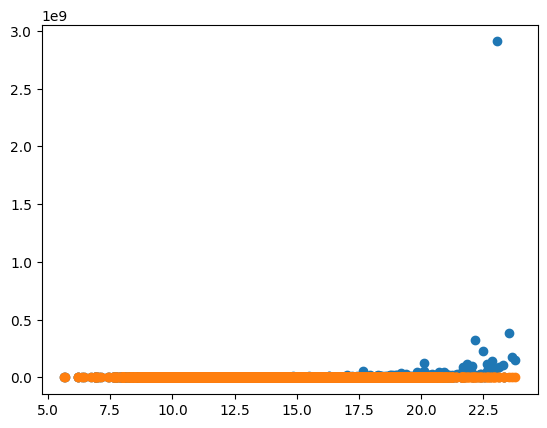

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df_test['t'], df_test['p'])
plt.scatter(df_test['t'], prediction)
plt.show()